<h1>Projet Machine Learning</h1>


> ##### *Nicolas Nenny-Pirotte*
> ##### *Samuel Largange*  
> ##### *Franck Nkolongo*  
> ##### *Patrick Opely*  
> ##### *Mountagha Camara*  

#### Contexte

> Nous avons choisi de travailler avec un fichier portant sur l'analyse chimique de 1599 vins rouges "Vinho Verde" issus du portugal contenant 11 valeurs chimiques (taux d'alcool, chlorides, etc) et 1 valeur "qualité" dont la valeur a été déterminée par plusieurs experts sur une base sensorielle.<br/>
> Le dataset peut-être trouvé à cette adresse : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

#### Lecture du fichier et aperçu du dataset

In [2]:
# Import des packages d'analyse de données nécessaires
import pandas as pd # Manipulation des dataframes
import math # Outils de calcul
import matplotlib.pyplot as plt # Outils de visualisation
import numpy as np
import seaborn as sns # Outils de visualisation

# Confort visuel : Agrandissement des cellules à la largeur de la fenêtre
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import des packages de machine learning nécessaires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample,shuffle

import warnings
warnings.filterwarnings('ignore')

In [4]:
wine_df = pd.read_csv('Files/red_wine_quality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Etude des données

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> Nous constatons que le dataframe créé contient bien 12 colonnes et 1599 lignes, que les valeurs sont toutes de type numérique et qu'aucun NaN ne se trouve dans les données. Aucun travail de nettoyage n'est donc nécessaire.

In [6]:
wine_df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

> Autre constatation, la distribution de la valeur qualité nous montre que le dataset contient une majorité de vin de qualité 5 ou 6 que nous pourrions qualifier de "communs" et très peu de vins très mauvais ou très bons. Ce déséquilibre de classes risque d'entraîner une nécessité de sous ou sur échantilloner nos classes afin d'obtenir des résultats pertinents.

### Sur-échantillonage
Nous avons fait le choix de créer une copie de notre dataset et de sur-échantilloner la copie afin d'obtenir un même nombre de lignes pour chaque valeur de qualité. Nous aurons ainsi la possibilité de comparer les résultats afin de pouvoir mesurer l'importance de la répartition des classes

In [7]:
# Nous commençons par découper notre dataset selon les valeurs de quality et stockons les résultats dans des variables
quality_3 = wine_df[wine_df['quality'] == 3]
quality_4 = wine_df[wine_df['quality'] == 4]
quality_5 = wine_df[wine_df['quality'] == 5]
quality_6 = wine_df[wine_df['quality'] == 6]
quality_7 = wine_df[wine_df['quality'] == 7]
quality_8 = wine_df[wine_df['quality'] == 8]

In [8]:
# Utilisation de la fonction resample de sklearn afin de sur-échantilloner nos qualityes. Le plus grand nombre de données étant 681 pour quality = 5 nous sur-échantillonons les autres qualityes afin d'arriver au même nombre de lignes
quality_3_upsampled = resample(quality_3,replace=True,n_samples=681,random_state = 123)
quality_4_upsampled = resample(quality_4,replace=True,n_samples=681,random_state = 123)
quality_6_upsampled = resample(quality_6,replace=True,n_samples=681,random_state = 123)
quality_7_upsampled = resample(quality_7,replace=True,n_samples=681,random_state = 123)
quality_8_upsampled = resample(quality_8,replace=True,n_samples=681,random_state = 123)

# Puis on réassemble le tout dans un nouveau dataframe que l'on mélange afin de ne pas avoir les valeurs qualityées dans l'ordre de concaténation
wine_df_balanced = pd.concat([quality_3_upsampled,quality_4_upsampled,quality_6_upsampled,quality_7_upsampled,quality_8_upsampled,quality_5])
wine_df_balanced = shuffle(wine_df_balanced).reset_index(drop = True)
wine_df_balanced.groupby('quality').size()

quality
3    681
4    681
5    681
6    681
7    681
8    681
dtype: int64

In [9]:
wine_df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086 entries, 0 to 4085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4086 non-null   float64
 1   volatile acidity      4086 non-null   float64
 2   citric acid           4086 non-null   float64
 3   residual sugar        4086 non-null   float64
 4   chlorides             4086 non-null   float64
 5   free sulfur dioxide   4086 non-null   float64
 6   total sulfur dioxide  4086 non-null   float64
 7   density               4086 non-null   float64
 8   pH                    4086 non-null   float64
 9   sulphates             4086 non-null   float64
 10  alcohol               4086 non-null   float64
 11  quality               4086 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 383.2 KB


In [10]:
wine_df_balanced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
1,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4
2,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7
3,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
4,9.6,0.380,0.42,1.9,0.071,5.0,13.0,0.99659,3.15,0.75,10.5,6


On constate qu'on a bien désormais un même nombre de données pour toutes nos classes

## Corrélations et analyse des variables

In [11]:
correlations = wine_df.corr()['quality'].drop('quality').sort_values(ascending = False).round(2)
print('Corrélations initiales')
print(correlations)

print()

correlations_balanced = wine_df_balanced.corr()['quality'].drop('quality').sort_values(ascending = False).round(2)
print('Corrélations équilibrées')
print(correlations_balanced)

Corrélations initiales
alcohol                 0.48
sulphates               0.25
citric acid             0.23
fixed acidity           0.12
residual sugar          0.01
free sulfur dioxide    -0.05
pH                     -0.06
chlorides              -0.13
density                -0.17
total sulfur dioxide   -0.19
volatile acidity       -0.39
Name: quality, dtype: float64

Corrélations équilibrées
alcohol                 0.58
sulphates               0.39
citric acid             0.37
fixed acidity           0.11
free sulfur dioxide     0.04
total sulfur dioxide    0.02
residual sugar         -0.00
pH                     -0.26
chlorides              -0.30
density                -0.31
volatile acidity       -0.60
Name: quality, dtype: float64


> Après génération des corrélations entre chaque variable et la variable qualité, nous avons une vue d'ensemble sur les éléments semblant jouer un rôle important dans la qualité finale du vin.
> Plus les éléments se trouvent haut dans la liste et plus leur valeur joue un rôle bénéfique sur la valeur qualité, à l'inverse plus ils sont vers le bas et plus leur valeur fera baisser la qualité du vin.<br/>
> On peut donc déjà noter qu'il semblerait que plus le taux d'alcool est élevé, plus la qualité augmente, alors que plus le taux d'acidité volatile est élevé et plus la qualité diminue.<br/><br/>
> On remarque également qu'après sur-échantillonage, les corrélations s'en trouvent changées. La plupart des valeurs augmentent que ce soit en positif ou en négatif, sauf pour le "total sulfur dioxide" pour lequel le sur-échantillonage à totalement changé l'impact, passant de deuxième plus négatif à très légèrement positif

Afin d'avoir une vue plus globale des corrélations entre chaques variable à des fins de curiosité, nous pouvons également afficher une heatmap de ces dernières

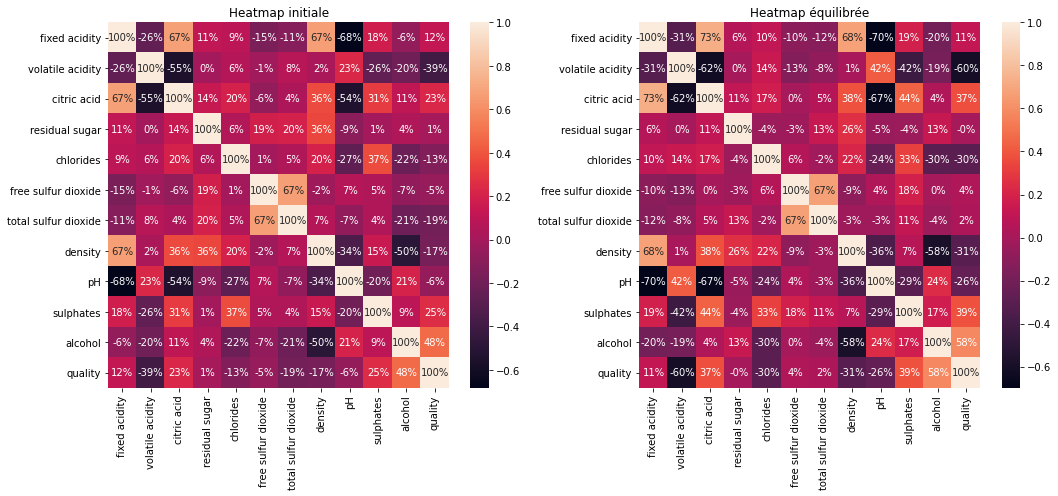

In [12]:
plt.figure(figsize=(15,7)) # Agrandissement de la figure à la taille voulue

plt.subplot(1,2,1) # Définition du premier sous plot
sns.heatmap(wine_df.corr(), annot=True, fmt='.0%') # Génération d'une heatmap avec légende et valeurs exprimées en %
plt.title('Heatmap initiale') # Création d'un titre

plt.subplot(1,2,2) # Définition du premier sous plot
sns.heatmap(wine_df_balanced.corr(), annot=True, fmt='.0%') # Génération d'une heatmap avec légende et valeurs exprimées en %
plt.title('Heatmap équilibrée') # Création d'un titre

plt.tight_layout() # Appel de la fonction layout() pour une meilleur lisibilité
plt.show() # Affichage du résultat

### Analysons désormais plus en détail la répartition des variables semblant avoir le plus grand impact sur la qualité
Nous avons choisi de sélectionner les variables dont la corrélation est d'au moins 19%. (20% en réalité mais en ajoutant "total sulfur dioxide" afin de ne pas avoir qu'une seule valeur négative)

In [13]:
wine_df[['alcohol', 'sulphates', 'citric acid', 'total sulfur dioxide', 'volatile acidity']].describe()

,alcohol,sulphates,citric acid,total sulfur dioxide,volatile acidity
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,10.422983,0.658149,0.270976,46.467792,0.527821
std,1.065668,0.169507,0.194801,32.895324,0.179060
min,8.400000,0.330000,0.000000,6.000000,0.120000
25%,9.500000,0.550000,0.090000,22.000000,0.390000
50%,10.200000,0.620000,0.260000,38.000000,0.520000
75%,11.100000,0.730000,0.420000,62.000000,0.640000
max,14.900000,2.000000,1.000000,289.000000,1.580000


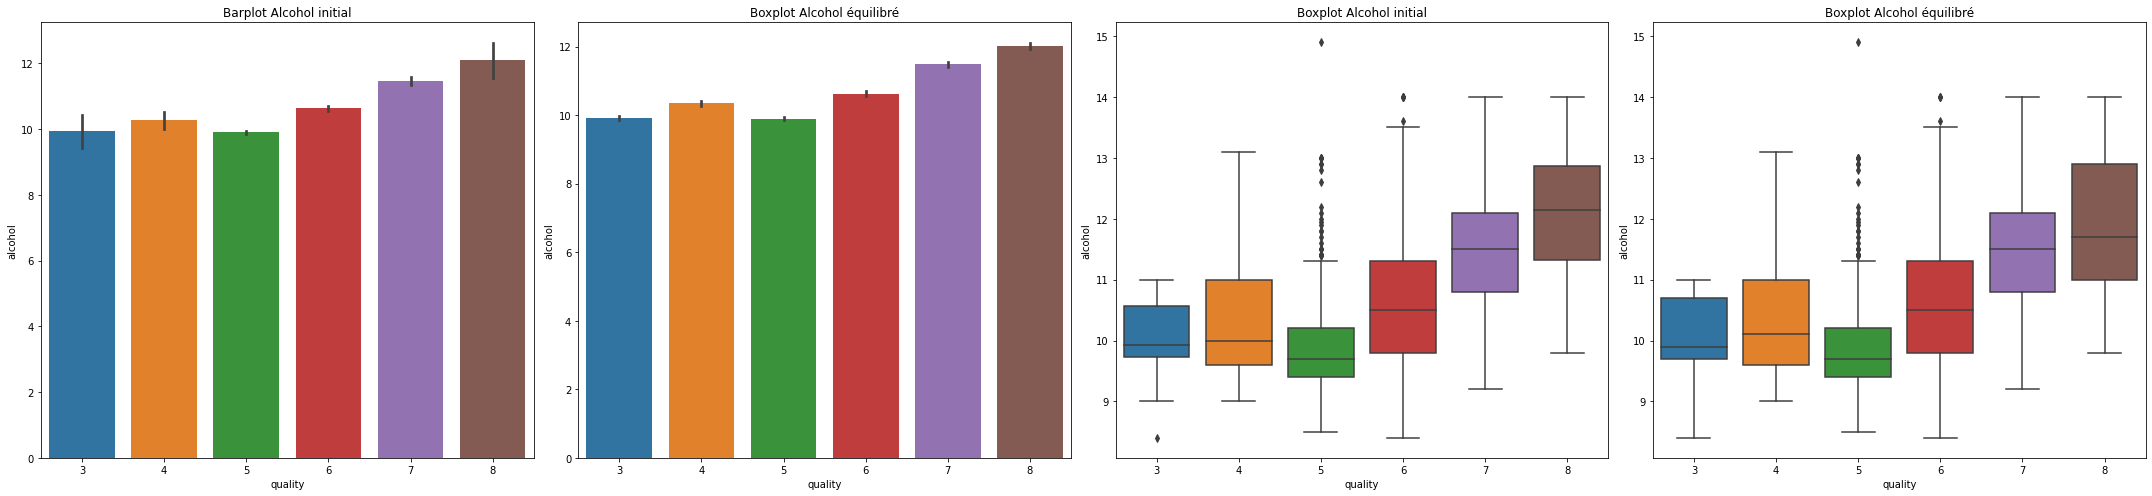

In [14]:
# Affichage de la répartition de la quantité d'alcool pour chaque valeur de qualité

plt.subplots(figsize=(30,7)) # Définition de la taille de nos plots

plt.subplot(1,4,1) # Définition du premier sous plot
sns.barplot(x = 'quality', y = 'alcohol', data = wine_df) # Génération d'un barplot avec quality en abscisse et alcohol en ordonnée
plt.title('Barplot Alcohol initial') # Création d'un titre

plt.subplot(1,4,2) # Définition du second sous plot
sns.barplot(x = 'quality', y = 'alcohol', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et alcohol en ordonnée
plt.title('Boxplot Alcohol équilibré') # Création d'un titre

plt.subplot(1,4,3) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'alcohol', data = wine_df) # Génération d'un boxplot avec quality en abscisse et alcohol en ordonnée
plt.title('Boxplot Alcohol initial') # Création d'un titre

plt.subplot(1,4,4) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'alcohol', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et alcohol en ordonnée
plt.title('Boxplot Alcohol équilibré') # Création d'un titre

plt.tight_layout() # Appel de la fonction layout() pour une meilleur lisibilité
plt.show() # Affichage du résultat

> L'affichage du barplot à gauche nous permet de voir directement pourquoi les corrélations placent la valeur "alcohol" comme étant la plus importante. En effet, plus la valeur est élevée, plus la qualité l'est également.<br/>
> Le boxplot de droite quant à lui nous montre que certaines variables contiennent de nombreux outliers, notamment pour une "quality" de 5. Il conviendra d'étudier la possibilité de gérer ou non ces outliers lors de nos futurs analyses<br/>
> On remarque grâce au sur-échantillonnage que l'intervalle de confiance de chaque classe à nettement diminuté, ce qui est se reflète également dans certains outliers qui ne sont plus considérés comme tels.

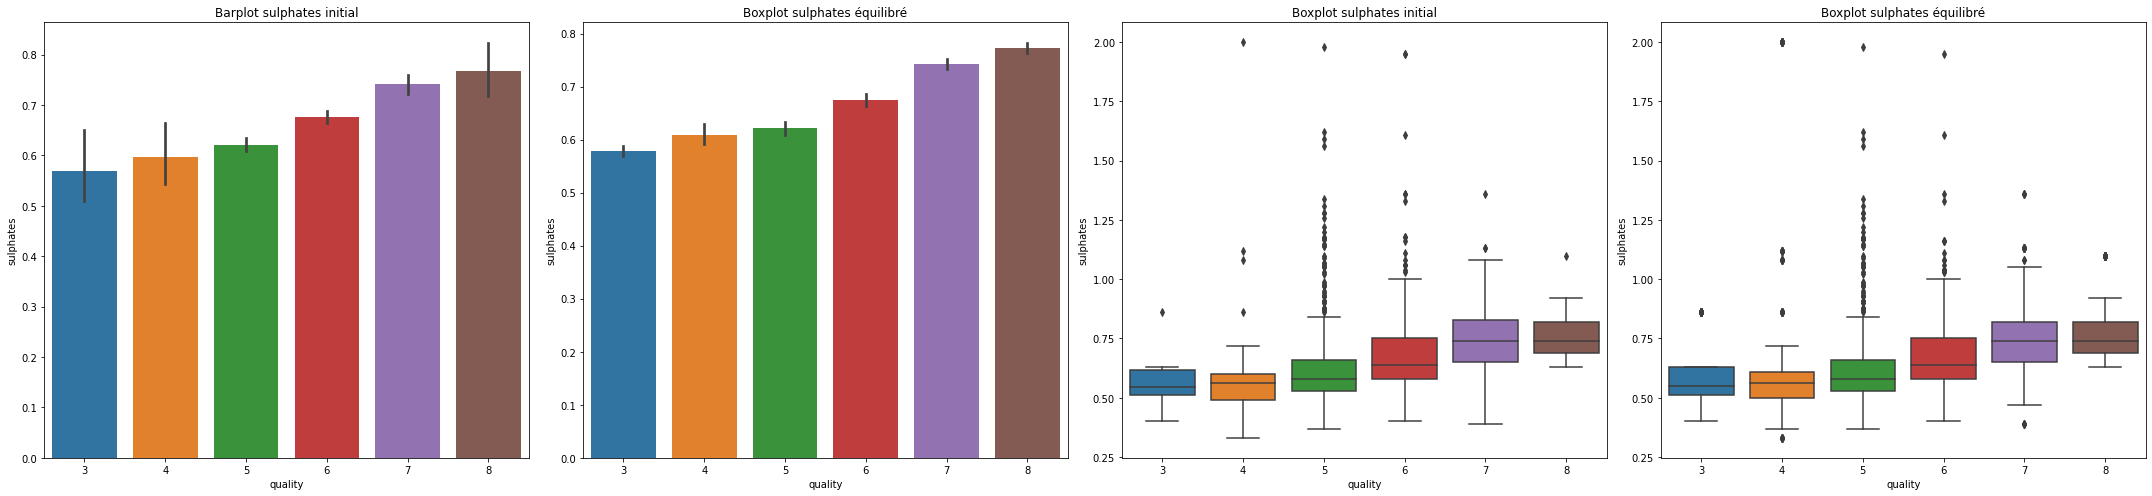

In [15]:
# Affichage de la répartition de la quantité d'alcool pour chaque valeur de qualité

plt.subplots(figsize=(30,7)) # Définition de la taille de nos plots

plt.subplot(1,4,1) # Définition du premier sous plot
sns.barplot(x = 'quality', y = 'sulphates', data = wine_df) # Génération d'un barplot avec quality en abscisse et sulphates en ordonnée
plt.title('Barplot sulphates initial') # Création d'un titre

plt.subplot(1,4,2) # Définition du second sous plot
sns.barplot(x = 'quality', y = 'sulphates', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et sulphates en ordonnée
plt.title('Boxplot sulphates équilibré') # Création d'un titre

plt.subplot(1,4,3) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'sulphates', data = wine_df) # Génération d'un boxplot avec quality en abscisse et sulphates en ordonnée
plt.title('Boxplot sulphates initial') # Création d'un titre

plt.subplot(1,4,4) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'sulphates', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et sulphates en ordonnée
plt.title('Boxplot sulphates équilibré') # Création d'un titre

plt.tight_layout() # Appel de la fonction layout() pour une meilleur lisibilité
plt.show() # Affichage du résultat

> Comme précédement, nous pouvons voir directement pourquoi les corrélations placent la valeur "alcohol" comme étant la plus importante, nous constatons cependant que pour cette variable le nombre d'outliers semble être bien plus important et concerne toutes les valeurs de "quality".<br/>
> Il conviendra d'étudier la possibilité de supprimer ou non ces outliers lors de nos futurs analyses

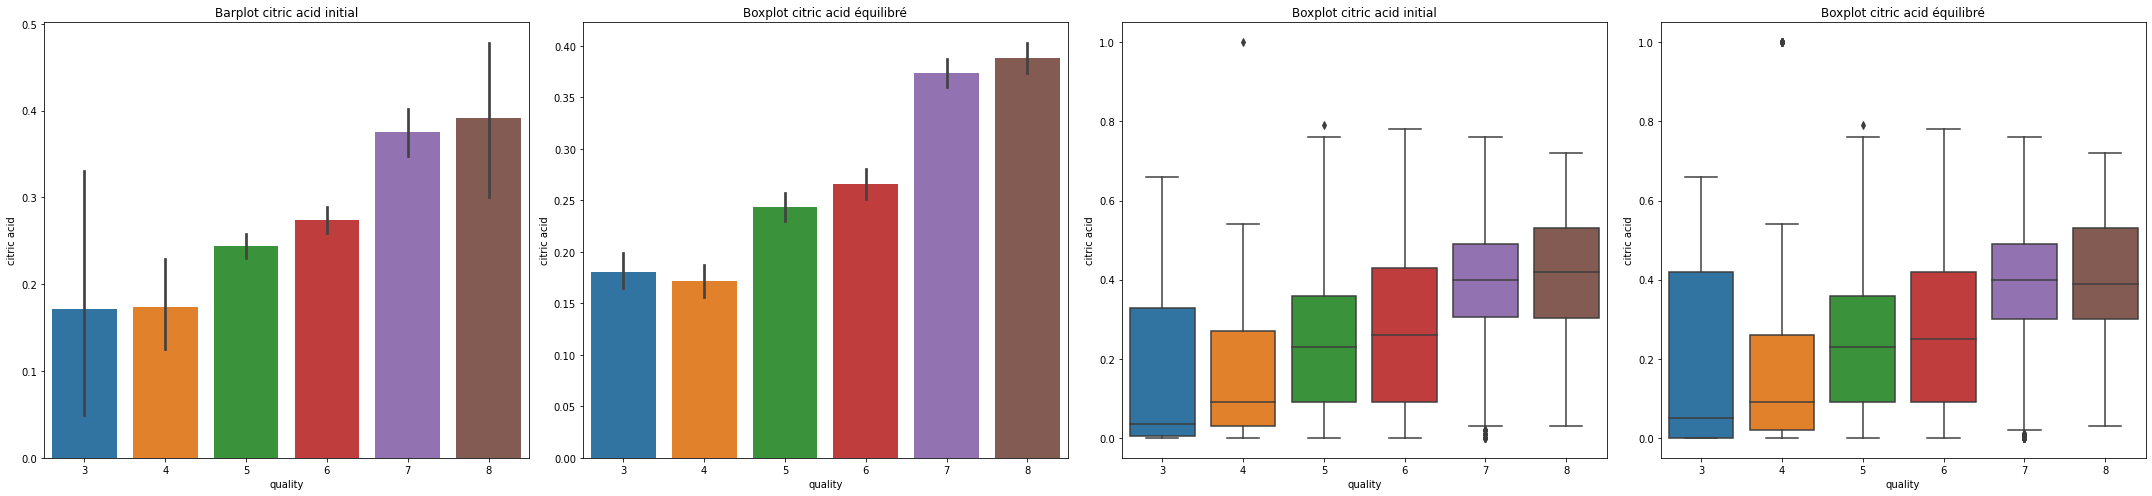

In [16]:
# Affichage de la répartition de la quantité d'alcool pour chaque valeur de qualité

plt.subplots(figsize=(30,7)) # Définition de la taille de nos plots

plt.subplot(1,4,1) # Définition du premier sous plot
sns.barplot(x = 'quality', y = 'citric acid', data = wine_df) # Génération d'un barplot avec quality en abscisse et citric acid en ordonnée
plt.title('Barplot citric acid initial') # Création d'un titre

plt.subplot(1,4,2) # Définition du second sous plot
sns.barplot(x = 'quality', y = 'citric acid', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et citric acid en ordonnée
plt.title('Boxplot citric acid équilibré') # Création d'un titre

plt.subplot(1,4,3) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'citric acid', data = wine_df) # Génération d'un boxplot avec quality en abscisse et citric acid en ordonnée
plt.title('Boxplot citric acid initial') # Création d'un titre

plt.subplot(1,4,4) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'citric acid', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et citric acid en ordonnée
plt.title('Boxplot citric acid équilibré') # Création d'un titre

plt.tight_layout() # Appel de la fonction layout() pour une meilleur lisibilité
plt.show() # Affichage du résultat

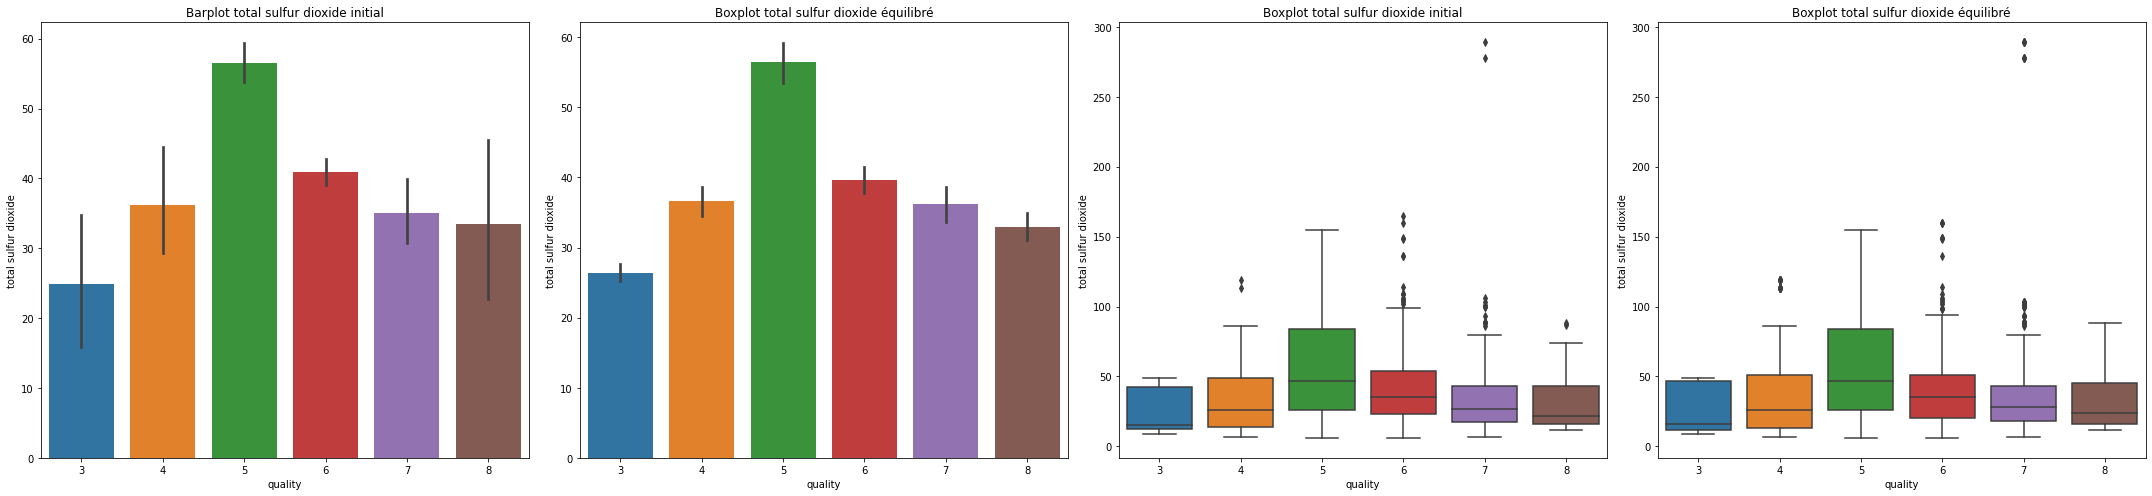

In [17]:
# Affichage de la répartition de la quantité d'alcool pour chaque valeur de qualité

plt.subplots(figsize=(30,7)) # Définition de la taille de nos plots

plt.subplot(1,4,1) # Définition du premier sous plot
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_df) # Génération d'un barplot avec quality en abscisse et total sulfur dioxide en ordonnée
plt.title('Barplot total sulfur dioxide initial') # Création d'un titre

plt.subplot(1,4,2) # Définition du second sous plot
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et total sulfur dioxide en ordonnée
plt.title('Boxplot total sulfur dioxide équilibré') # Création d'un titre

plt.subplot(1,4,3) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = wine_df) # Génération d'un boxplot avec quality en abscisse et total sulfur dioxide en ordonnée
plt.title('Boxplot total sulfur dioxide initial') # Création d'un titre

plt.subplot(1,4,4) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et total sulfur dioxide en ordonnée
plt.title('Boxplot total sulfur dioxide équilibré') # Création d'un titre

plt.tight_layout() # Appel de la fonction layout() pour une meilleur lisibilité
plt.show() # Affichage du résultat

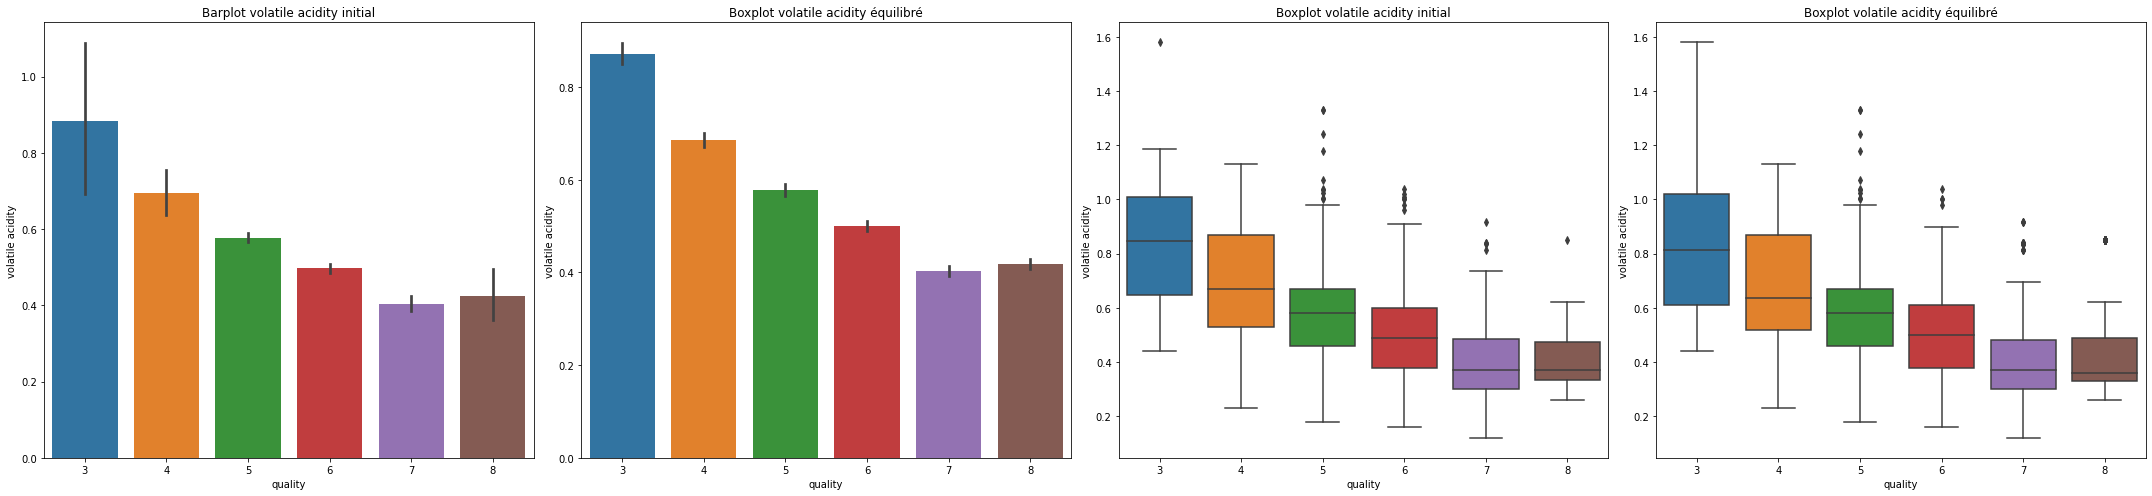

In [18]:
# Affichage de la répartition de la quantité d'alcool pour chaque valeur de qualité

plt.subplots(figsize=(30,7)) # Définition de la taille de nos plots

plt.subplot(1,4,1) # Définition du premier sous plot
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_df) # Génération d'un barplot avec quality en abscisse et volatile acidity en ordonnée
plt.title('Barplot volatile acidity initial') # Création d'un titre

plt.subplot(1,4,2) # Définition du second sous plot
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et volatile acidity en ordonnée
plt.title('Boxplot volatile acidity équilibré') # Création d'un titre

plt.subplot(1,4,3) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'volatile acidity', data = wine_df) # Génération d'un boxplot avec quality en abscisse et volatile acidity en ordonnée
plt.title('Boxplot volatile acidity initial') # Création d'un titre

plt.subplot(1,4,4) # Définition du second sous plot
sns.boxplot(x = 'quality', y = 'volatile acidity', data = wine_df_balanced) # Génération d'un boxplot avec quality en abscisse et volatile acidity en ordonnée
plt.title('Boxplot volatile acidity équilibré') # Création d'un titre

plt.tight_layout() # Appel de la fonction layout() pour une meilleur lisibilité
plt.show() # Affichage du résultat

Note : L'acidité volatile est ce qui en trop grande quantité donne un goût vinaigré au vin, ce qui explique parfaitement pourquoi plus le taux est élevé plus la valeur "quality" est basse.<br/> source : https://dico-du-vin.com/

## Première prédiction
Pour commencer nous avons décider d'ajouter une nouvelle colonne au dataset, "Tiers_List" afin de classer les vins en 3 catégories selon la valeur de "quality". Le but sera de prédire à quelle catégorie appartient un vin en fonction de ses propriétés.<br/>
Comme nous l'avons fait jusqu'à présent, nous continuerons à mener nos études sur les deux datasets (initial et sur-échantillonné) en parallèle afin d'évaluer au mieux les différences entre les deux

In [19]:
wine_df_tlist = wine_df.copy() # Nous créons une copie du dataset sur lequel nous appliquerons nos modifications
wine_df_tlist_balanced = wine_df_balanced.copy()

Tiers_List = []
for wine in wine_df_tlist['quality']: # Pour tous les vins du dataset, ajout de la valeur Tiers_List en fonction de la valeur quality
    if 1 <= wine <= 4:
        Tiers_List.append('Mauvais')
    elif 4 < wine <= 6:
        Tiers_List.append('Correct')
    else:
        Tiers_List.append('Bon')

Tiers_List_balanced = []
for wine in wine_df_tlist_balanced['quality']:
    if 1 <= wine <= 4:
        Tiers_List_balanced.append('Mauvais')
    elif 4 < wine <= 6:
        Tiers_List_balanced.append('Correct')
    else:
        Tiers_List_balanced.append('Bon')

wine_df_tlist['Tiers_List'] = Tiers_List
wine_df_tlist_balanced['Tiers_List'] = Tiers_List_balanced

In [20]:
wine_df_tlist.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tiers_List
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Correct
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Correct
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Correct
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Correct
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Correct


In [21]:
wine_df_tlist_balanced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tiers_List
0,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,Mauvais
1,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4,Mauvais
2,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7,Bon
3,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5,Correct
4,9.6,0.380,0.42,1.9,0.071,5.0,13.0,0.99659,3.15,0.75,10.5,6,Correct


In [22]:
wine_df_tlist_balanced['Tiers_List'].value_counts()

Bon        1362
Mauvais    1362
Correct    1362
Name: Tiers_List, dtype: int64

In [23]:
# Séparation de nos jeux de données entre variables prédictives et variable à prédire

xtlist = wine_df_tlist.loc[:, wine_df_tlist.columns != 'Tiers_List']
ytlist = wine_df_tlist['Tiers_List']

xtlist_balanced = wine_df_tlist_balanced.loc[:, wine_df_tlist_balanced.columns != 'Tiers_List']
ytlist_balanced = wine_df_tlist_balanced['Tiers_List']

In [24]:
# Génération de nos jeux d'entraînement et de test et vérification de leur taille
xtlist_train, xtlist_test, ytlist_train, ytlist_test = train_test_split(xtlist, ytlist, test_size = 0.1, random_state = 5)
xtlist_train_balanced, xtlist_test_balanced, ytlist_train_balanced, ytlist_test_balanced = train_test_split(xtlist_balanced, ytlist_balanced, test_size = 0.5, random_state = 5)
print(xtlist_test.shape)
print(xtlist_test_balanced.shape)

(160, 12)
(2043, 12)


In [26]:
results_new=pd.DataFrame(columns=['Taille jeu de test (%)','Précision Initiale (%)', 'Précision Equilibrée (%)'])
regressor = LogisticRegression(solver='lbfgs', max_iter=10000)

# Double application de la régression logistique, sur les jeux avec Tlist en premier sur le jeu de données initial puis sur celui sur-échantillonné
# La précision obtenue étant de 100% nous avons décidé d'utiliser le modèle en variant la taille de nos jeux de test afin de voir les résultats obtenus
for i in np.arange(0.1,0.9,0.1):
    xtlist_train, xtlist_test, ytlist_train, ytlist_test = train_test_split(xtlist, ytlist, test_size = i.round(1), random_state = 5)
    xtlist_train_balanced, xtlist_test_balanced, ytlist_train_balanced, ytlist_test_balanced = train_test_split(xtlist_balanced, ytlist_balanced, test_size = i.round(1), random_state = 5)
    
    regressor.fit(xtlist_train, ytlist_train)
    pred = regressor.predict(xtlist_test)
    
    regressor.fit(xtlist_train_balanced, ytlist_train_balanced)
    pred_balanced = regressor.predict(xtlist_test_balanced)
    
    results_new.loc[i] = [100*i,100*np.round(accuracy_score(ytlist_test,pred),decimals=4), 100*np.round(accuracy_score(ytlist_test_balanced,pred_balanced),decimals=4)]
print('Régression logistique')
print(results_new)

Régression logistique
     Taille jeu de test (%)  Précision Initiale (%)  Précision Equilibrée (%)
0.1                    10.0                  100.00                     100.0
0.2                    20.0                  100.00                     100.0
0.3                    30.0                  100.00                     100.0
0.4                    40.0                  100.00                     100.0
0.5                    50.0                   99.88                     100.0
0.6                    60.0                   99.69                     100.0
0.7                    70.0                   99.73                     100.0
0.8                    80.0                   99.84                     100.0


#### On constate que la précision est extrêmement élevée quelque soit la taille du jeu de test, que la répartition des classes soit équilibrée ou non. Essayons également avec d'autres modèles afin d'étudier les possibles différences de résultat

Dataframe avec Tiers List initial
                          Précision (%)
Régression Logistique            100.00
Arbre de décision                100.00
Random Forest                    100.00
Support Vecteur Machines          86.25
K-nearest Neighbors               91.25

Dataframe avec Tiers List équilibré
                          Précision (%)
Régression Logistique            100.00
Arbre de décision                100.00
Random Forest                    100.00
Support Vecteur Machines          91.93
K-nearest Neighbors               93.64


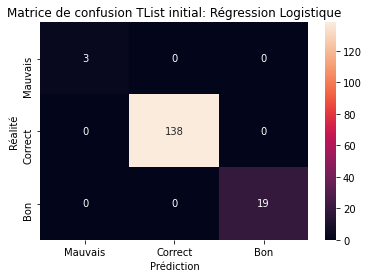

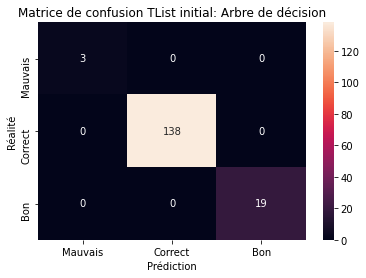

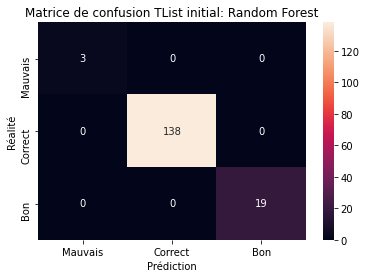

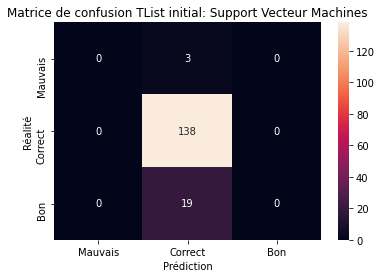

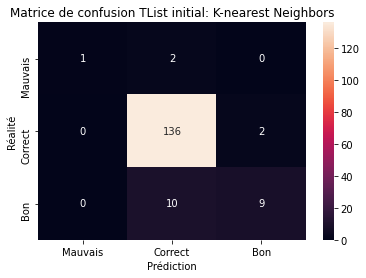

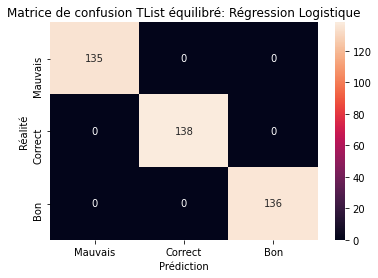

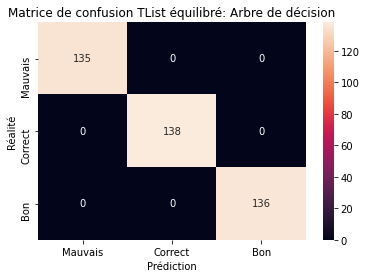

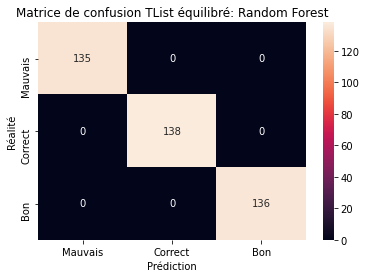

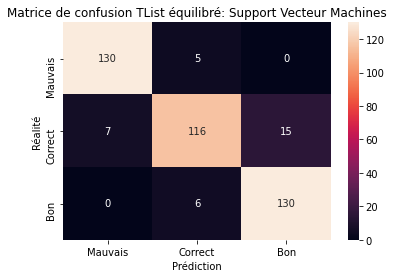

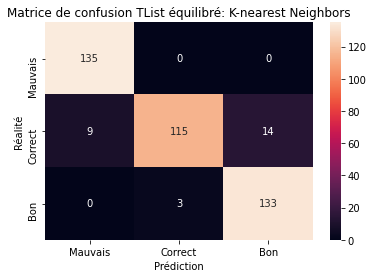

In [28]:
# Création d'un dictionnaire contenant les différents modèles
classifiers = {
    'Régression Logistique' : LogisticRegression(max_iter=10000),
    'Arbre de décision' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vecteur Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier()
}

# Génération de nos jeux de données
xtlist_train, xtlist_test, ytlist_train, ytlist_test = train_test_split(xtlist, ytlist, test_size = 0.1, random_state = 5)
xtlist_train_balanced, xtlist_test_balanced, ytlist_train_balanced, ytlist_test_balanced = train_test_split(xtlist_balanced, ytlist_balanced, test_size = 0.1, random_state = 5)

labels=["Mauvais", "Correct", "Bon"]
results=pd.DataFrame(columns=['Précision (%)'])

# Boucle d'application de nos modèles avec génération d'une matrice de confusion pour chacun
for method,func in classifiers.items():
    func.fit(xtlist_train,ytlist_train)
    pred = func.predict(xtlist_test)
    results.loc[method]= [100*np.round(accuracy_score(ytlist_test,pred),decimals=4)]
    
    Mat_conf=confusion_matrix(ytlist_test, pred, labels)
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    plt.title('Matrice de confusion TList initial: {}'.format(method))
    sns.heatmap(Mat_conf, annot = True, fmt = 'g', ax = ax)
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Réalité')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)    
    
print('Dataframe avec Tiers List initial')
print(results)

# Même chose pour le jeu de données sur-échantillonné
results_balanced=pd.DataFrame(columns=['Précision (%)'])
for method,func in classifiers.items():
    func.fit(xtlist_train_balanced,ytlist_train_balanced)
    pred = func.predict(xtlist_test_balanced)
    results_balanced.loc[method]= [100*np.round(accuracy_score(ytlist_test_balanced,pred),decimals=4)]
    
    Mat_conf=confusion_matrix(ytlist_test_balanced, pred, labels)
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    plt.title('Matrice de confusion TList équilibré: {}'.format(method))
    sns.heatmap(Mat_conf, annot = True, fmt = 'g', ax = ax)
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Réalité')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
print()
print('Dataframe avec Tiers List équilibré')
print(results_balanced)

> On constate ici que la précision de 100% est conservée pour les 3 premiers modèles mais surtout que l'on obtient un gain de 3% de précision sur les deux derniers grâce au sur-échantillonnage

## Prédiction directe de la qualité

In [29]:
# Séparation du dataframe
x = wine_df.loc[:, wine_df.columns != 'quality']
y = wine_df['quality']

x_balanced = wine_df_balanced.loc[:, wine_df_balanced.columns != 'quality']
y_balanced = wine_df_balanced['quality']

In [30]:
# Génération de nos jeux d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 5)
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(x_balanced, y_balanced, test_size = 0.1, random_state = 5)
x_test.shape

(160, 11)

Wine Dataframe
                          Précision %
Régression Logistique           70.00
Arbre de décision               71.88
Random Forest                   77.50
Support Vecteur Machines        52.50
K-nearest Neighbors             58.75

Wine Dataframe équilibré
                          Précision %
Régression Logistique           54.77
Arbre de décision               93.40
Random Forest                   94.62
Support Vecteur Machines        41.08
K-nearest Neighbors             82.15


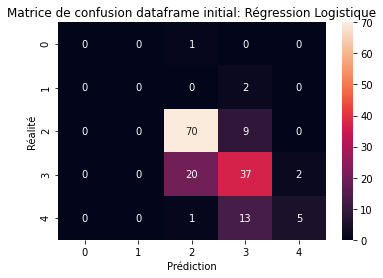

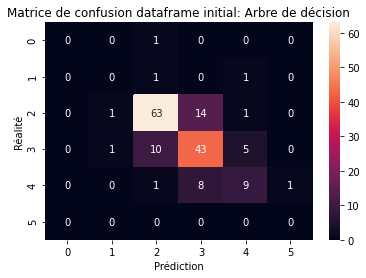

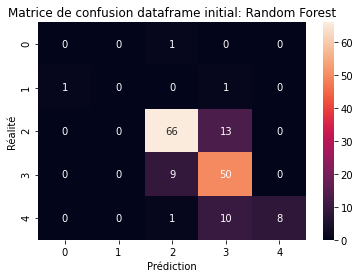

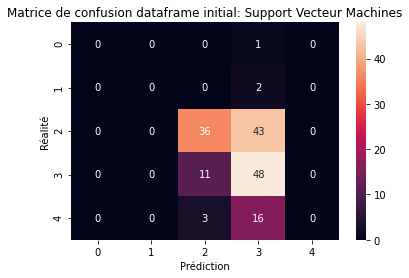

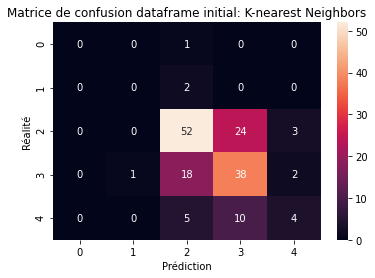

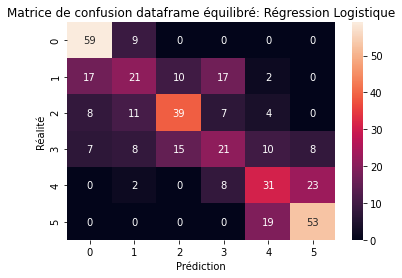

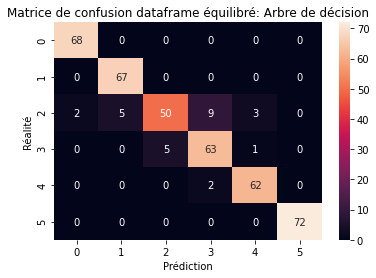

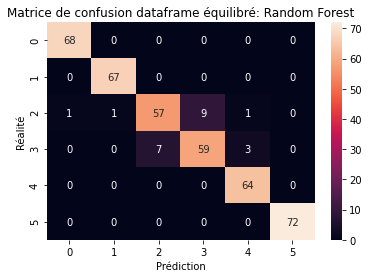

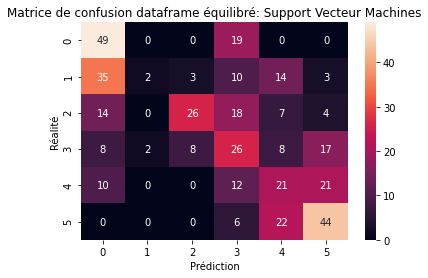

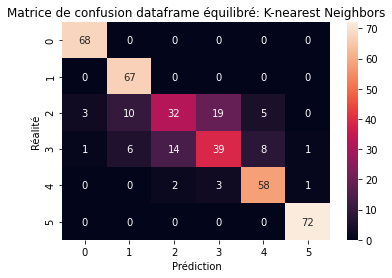

In [40]:
results=pd.DataFrame(columns=['Précision %'])
# labels=["3", "4", "5", "6", "7", "8"]

for method,func in classifiers.items():
    func.fit(x_train,y_train)
    pred = func.predict(x_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4)] 
    Mat_conf=confusion_matrix(y_test, pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    plt.title('Matrice de confusion dataframe initial: {}'.format(method))
    sns.heatmap(Mat_conf, annot = True, fmt = 'g', ax = ax)
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Réalité')
     
    
print('Wine Dataframe')
print(results)

print()

results_balanced=pd.DataFrame(columns=['Précision %'])

for method,func in classifiers.items():
    func.fit(x_train_balanced,y_train_balanced)
    pred = func.predict(x_test_balanced)
    results_balanced.loc[method]= [100*np.round(accuracy_score(y_test_balanced,pred),decimals=4)]
    
    Mat_conf=confusion_matrix(y_test_balanced, pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    plt.title('Matrice de confusion dataframe équilibré: {}'.format(method))
    sns.heatmap(Mat_conf, annot = True, fmt = 'g', ax = ax)
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Réalité')
    
    
print('Wine Dataframe équilibré')
print(results_balanced)

In [34]:
pred

array([3, 7, 7, 4, 6, 3, 4, 8, 4, 8, 8, 6, 4, 3, 8, 7, 5, 6, 6, 4, 4, 5,
       3, 8, 8, 6, 4, 8, 6, 6, 3, 4, 4, 4, 6, 8, 8, 3, 8, 7, 4, 7, 6, 3,
       3, 4, 4, 6, 6, 4, 5, 7, 5, 7, 5, 7, 4, 6, 6, 5, 7, 7, 5, 6, 5, 4,
       6, 4, 6, 4, 3, 4, 8, 7, 4, 8, 7, 7, 7, 3, 8, 8, 7, 4, 4, 6, 3, 3,
       7, 3, 6, 7, 8, 4, 6, 3, 4, 4, 5, 6, 6, 6, 3, 3, 4, 6, 3, 8, 5, 5,
       3, 6, 6, 4, 8, 4, 4, 4, 7, 3, 7, 6, 3, 7, 8, 5, 7, 3, 6, 6, 3, 3,
       8, 4, 4, 7, 7, 8, 7, 7, 7, 8, 8, 6, 3, 5, 4, 8, 3, 8, 3, 3, 3, 4,
       4, 6, 6, 3, 5, 6, 7, 3, 7, 7, 7, 7, 4, 5, 7, 3, 3, 8, 5, 7, 5, 7,
       8, 8, 5, 3, 4, 7, 4, 7, 6, 4, 5, 6, 3, 3, 3, 3, 8, 5, 6, 8, 8, 6,
       4, 8, 5, 5, 5, 4, 7, 7, 8, 7, 5, 4, 4, 6, 8, 8, 7, 5, 3, 8, 4, 4,
       8, 7, 8, 5, 6, 8, 5, 4, 8, 6, 4, 8, 4, 6, 4, 4, 8, 6, 4, 3, 6, 6,
       4, 5, 6, 4, 7, 6, 3, 3, 7, 3, 5, 3, 4, 8, 8, 5, 8, 3, 3, 7, 8, 6,
       3, 8, 7, 6, 3, 4, 3, 8, 8, 4, 6, 4, 5, 8, 7, 4, 7, 6, 4, 8, 7, 4,
       7, 3, 8, 5, 8, 7, 5, 7, 6, 7, 7, 5, 3, 4, 8,

> Nous constatons une perte de plus ou moins 20% de précision sur les algorithmes de régression logistique et celui Support Vector Machine, ceci s'explique du fait que ces méthodes sont plus adaptées à la classification binaire (Avec les déséquilibre de classes l'algorithme choisissais systèmatiquement entre quelques valeurs et non la totalité des possibilités, on peut le voir sur les matrices de confusion). Le rééquilibrage des classes par la méthode de data augmentation appliquée aux données défavorise la précision de ces 2 algorithmes.

> Inversement, avec les algorithmes d'Arbre de décision et RF, l'on constate une augmentation de plus oun moins 20% car ils sont parfaitement adapté aux données ainsi qu'aux modeles de classification multiclasse 

> Le K-nearest est l'algorithme qui obtient le plus de gain +23%,